In [40]:
!pip install -q kaggle

In [41]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 74 bytes


In [42]:
!kaggle datasets download -d calvinsama/fresh-and-rotten-poultry-meat-datasets

 78% 21.0M/26.9M [00:00<00:00, 74.8MB/s]
100% 26.9M/26.9M [00:00<00:00, 76.0MB/s]


In [45]:
!unzip /content/fresh-and-rotten-poultry-meat-datasets.zip

Archive:  /content/fresh-and-rotten-poultry-meat-datasets.zip
  inflating: dataset_citra_dada_ayam/dataset 200x200/testing/busuk_segar/busuk_0001.jpg  
  inflating: dataset_citra_dada_ayam/dataset 200x200/testing/busuk_segar/busuk_0002.jpg  
  inflating: dataset_citra_dada_ayam/dataset 200x200/testing/busuk_segar/busuk_0057.jpg  
  inflating: dataset_citra_dada_ayam/dataset 200x200/testing/busuk_segar/busuk_0058.jpg  
  inflating: dataset_citra_dada_ayam/dataset 200x200/testing/busuk_segar/busuk_0068.jpg  
  inflating: dataset_citra_dada_ayam/dataset 200x200/testing/busuk_segar/busuk_0072.jpg  
  inflating: dataset_citra_dada_ayam/dataset 200x200/testing/busuk_segar/busuk_0073.jpg  
  inflating: dataset_citra_dada_ayam/dataset 200x200/testing/busuk_segar/busuk_0076.jpg  
  inflating: dataset_citra_dada_ayam/dataset 200x200/testing/busuk_segar/busuk_0095.jpg  
  inflating: dataset_citra_dada_ayam/dataset 200x200/testing/busuk_segar/busuk_0105.jpg  
  inflating: dataset_citra_dada_ayam/d

In [46]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from torch.autograd import Variable
import time
import os

In [47]:
os.mkdir("/content/dataset_citra_dada_ayam/train")
os.mkdir("/content/dataset_citra_dada_ayam/valid")
os.mkdir("/content/dataset_citra_dada_ayam/test")

In [48]:
os.mkdir("/content/dataset_citra_dada_ayam/train/rotten")
k = 0
for i in os.listdir("/content/dataset_citra_dada_ayam/dataset 200x200/training/busuk"):
  os.replace("/content/dataset_citra_dada_ayam/dataset 200x200/training/busuk/" + i, "/content/dataset_citra_dada_ayam/train/rotten/" + str(k) + ".jpg")
  k += 1
for i in os.listdir("/content/dataset_citra_dada_ayam/dataset 300x300/training/busuk"):
  os.replace("/content/dataset_citra_dada_ayam/dataset 300x300/training/busuk/" + i, "/content/dataset_citra_dada_ayam/train/rotten/" + str(k) + ".jpg")
  k += 1
for i in os.listdir("/content/dataset_citra_dada_ayam/dataset 400x400/training/busuk"):
  os.replace("/content/dataset_citra_dada_ayam/dataset 400x400/training/busuk/" + i, "/content/dataset_citra_dada_ayam/train/rotten/" + str(k) + ".jpg")
  k += 1


os.mkdir("/content/dataset_citra_dada_ayam/train/fresh")
k = 0
for i in os.listdir("/content/dataset_citra_dada_ayam/dataset 200x200/training/segar"):
  os.replace("/content/dataset_citra_dada_ayam/dataset 200x200/training/segar/" + i, "/content/dataset_citra_dada_ayam/train/fresh/" + str(k) + ".jpg")
  k += 1
for i in os.listdir("/content/dataset_citra_dada_ayam/dataset 300x300/training/segar"):
  os.replace("/content/dataset_citra_dada_ayam/dataset 300x300/training/segar/" + i, "/content/dataset_citra_dada_ayam/train/fresh/" + str(k) + ".jpg")
  k += 1
for i in os.listdir("/content/dataset_citra_dada_ayam/dataset 400x400/training/segar"):
  os.replace("/content/dataset_citra_dada_ayam/dataset 400x400/training/segar/" + i, "/content/dataset_citra_dada_ayam/train/fresh/" + str(k) + ".jpg")
  k += 1


os.mkdir("/content/dataset_citra_dada_ayam/valid/rotten")
k = 0
for i in os.listdir("/content/dataset_citra_dada_ayam/dataset 200x200/validation/busuk"):
  os.replace("/content/dataset_citra_dada_ayam/dataset 200x200/validation/busuk/" + i, "/content/dataset_citra_dada_ayam/valid/rotten/" + str(k) + ".jpg")
  k += 1
for i in os.listdir("/content/dataset_citra_dada_ayam/dataset 300x300/validation/busuk"):
  os.replace("/content/dataset_citra_dada_ayam/dataset 300x300/validation/busuk/" + i, "/content/dataset_citra_dada_ayam/valid/rotten/" + str(k) + ".jpg")
  k += 1
for i in os.listdir("/content/dataset_citra_dada_ayam/dataset 400x400/validation/busuk"):
  os.replace("/content/dataset_citra_dada_ayam/dataset 400x400/validation/busuk/" + i, "/content/dataset_citra_dada_ayam/valid/rotten/" + str(k) + ".jpg")
  k += 1


os.mkdir("/content/dataset_citra_dada_ayam/valid/fresh")
k = 0
for i in os.listdir("/content/dataset_citra_dada_ayam/dataset 200x200/validation/segar"):
  os.replace("/content/dataset_citra_dada_ayam/dataset 200x200/validation/segar/" + i, "/content/dataset_citra_dada_ayam/valid/fresh/" + str(k) + ".jpg")
  k += 1
for i in os.listdir("/content/dataset_citra_dada_ayam/dataset 300x300/validation/segar"):
  os.replace("/content/dataset_citra_dada_ayam/dataset 300x300/validation/segar/" + i, "/content/dataset_citra_dada_ayam/valid/fresh/" + str(k) + ".jpg")
  k += 1
for i in os.listdir("/content/dataset_citra_dada_ayam/dataset 400x400/validation/segar"):
  os.replace("/content/dataset_citra_dada_ayam/dataset 400x400/validation/segar/" + i, "/content/dataset_citra_dada_ayam/valid/fresh/" + str(k) + ".jpg")
  k += 1


os.mkdir("/content/dataset_citra_dada_ayam/test/rotten")
os.mkdir("/content/dataset_citra_dada_ayam/test/fresh")

r = 0
f = 0
for i in os.listdir("/content/dataset_citra_dada_ayam/dataset 200x200/testing/busuk_segar"):
  if "busuk" in i:
    os.replace("/content/dataset_citra_dada_ayam/dataset 200x200/testing/busuk_segar/" + i, "/content/dataset_citra_dada_ayam/test/rotten/" + str(r) + ".jpg")
    r += 1
  else:
    os.replace("/content/dataset_citra_dada_ayam/dataset 200x200/testing/busuk_segar/" + i, "/content/dataset_citra_dada_ayam/test/fresh/" + str(f) + ".jpg")
    f += 1
for i in os.listdir("/content/dataset_citra_dada_ayam/dataset 300x300/testing/busuk_segar"):
  if "busuk" in i:
    os.replace("/content/dataset_citra_dada_ayam/dataset 300x300/testing/busuk_segar/" + i, "/content/dataset_citra_dada_ayam/test/rotten/" + str(r) + ".jpg")
    r += 1
  else:
    os.replace("/content/dataset_citra_dada_ayam/dataset 300x300/testing/busuk_segar/" + i, "/content/dataset_citra_dada_ayam/test/fresh/" + str(f) + ".jpg")
    f += 1
for i in os.listdir("/content/dataset_citra_dada_ayam/dataset 400x400/testing/busuk_segar"):
  if "busuk" in i:
    os.replace("/content/dataset_citra_dada_ayam/dataset 400x400/testing/busuk_segar/" + i, "/content/dataset_citra_dada_ayam/test/rotten/" + str(r) + ".jpg")
    r += 1
  else:
    os.replace("/content/dataset_citra_dada_ayam/dataset 400x400/testing/busuk_segar/" + i, "/content/dataset_citra_dada_ayam/test/fresh/" + str(f) + ".jpg")
    f += 1

In [86]:
#bus - bad(0), seg - good(1)
trans = transforms.Compose([transforms.Resize([400, 400]), transforms.ToTensor()])
train = ImageFolder('/content/dataset_citra_dada_ayam/train', trans)
valid = ImageFolder('/content/dataset_citra_dada_ayam/valid', trans)
test = ImageFolder('/content/dataset_citra_dada_ayam/test', trans)
print(len(train), len(valid), len(test))

3764 467 467


In [85]:
def imshow(inp):
    inp = inp.numpy().transpose((1,2,0))
    plt.figure(figsize=(10,10))
    plt.imshow(inp)

0


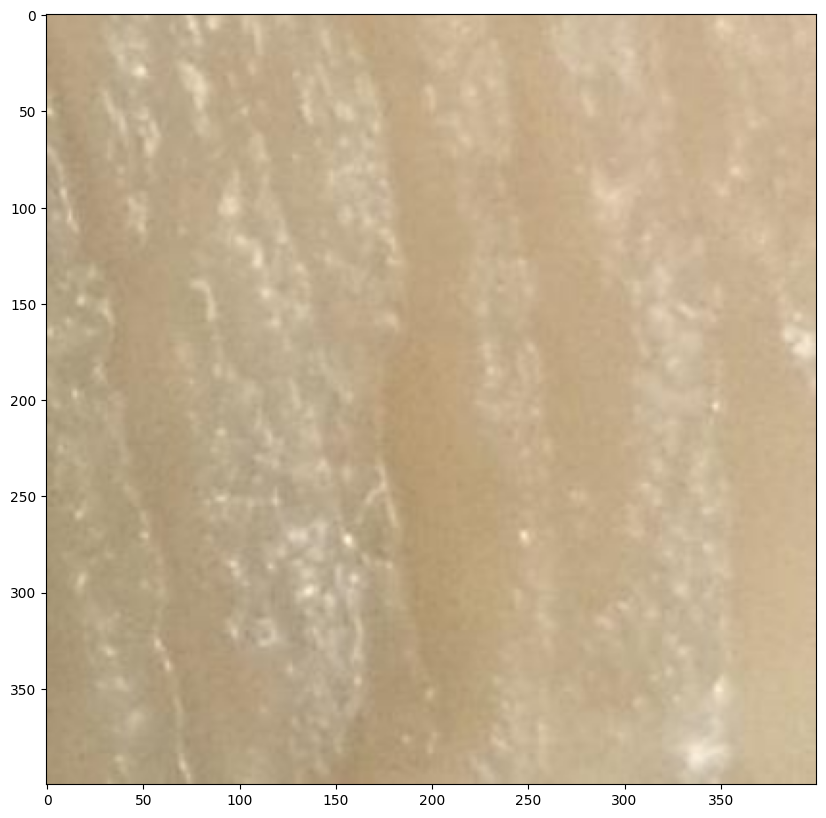

In [87]:
t = 301
imshow(train[t][0])
print(train[t][1])

In [88]:
train_batch = DataLoader(train, batch_size = 16, shuffle = True)
valid_batch = DataLoader(valid, batch_size = 16, shuffle = True)
test_batch = DataLoader(test, batch_size = 16, shuffle = True)

In [89]:
dataset_sizes = {'train':len(train_batch.dataset),'valid':len(valid_batch.dataset)}

dataloaders = {'train':train_batch,'valid':valid_batch}

In [90]:
model_ft = models.resnet50(pretrained = True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)
if torch.cuda.is_available():
    model_ft = model_ft.cuda()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [91]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=5):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in dataloaders[phase]:
                # get the inputs
                inputs, labels = data

                # wrap them in Variable
                if torch.cuda.is_available():
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.data
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [92]:
lr = 0.01
crit = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ft.parameters(), lr = lr, momentum = 0.7)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 10, gamma = 0.1)

In [93]:
model_ft = train_model(model_ft, crit, optimizer, scheduler,
                       num_epochs=21)

Epoch 0/20
----------


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


train Loss: 0.0133 Acc: 0.9192
valid Loss: 0.0072 Acc: 0.9615

Epoch 1/20
----------
train Loss: 0.0055 Acc: 0.9652
valid Loss: 0.0047 Acc: 0.9807

Epoch 2/20
----------
train Loss: 0.0044 Acc: 0.9764
valid Loss: 0.0050 Acc: 0.9743

Epoch 3/20
----------
train Loss: 0.0033 Acc: 0.9806
valid Loss: 0.0045 Acc: 0.9764

Epoch 4/20
----------
train Loss: 0.0019 Acc: 0.9886
valid Loss: 0.0036 Acc: 0.9850

Epoch 5/20
----------
train Loss: 0.0013 Acc: 0.9923
valid Loss: 0.0030 Acc: 0.9893

Epoch 6/20
----------
train Loss: 0.0009 Acc: 0.9952
valid Loss: 0.0064 Acc: 0.9786

Epoch 7/20
----------
train Loss: 0.0030 Acc: 0.9857
valid Loss: 0.0372 Acc: 0.7495

Epoch 8/20
----------
train Loss: 0.0011 Acc: 0.9947
valid Loss: 0.0047 Acc: 0.9829

Epoch 9/20
----------
train Loss: 0.0005 Acc: 0.9984
valid Loss: 0.0049 Acc: 0.9850

Epoch 10/20
----------
train Loss: 0.0002 Acc: 0.9997
valid Loss: 0.0047 Acc: 0.9850

Epoch 11/20
----------
train Loss: 0.0002 Acc: 0.9995
valid Loss: 0.0048 Acc: 0.9850



In [94]:
running_loss = 0
running_corrects = 0

for data in test_batch:
  inputs, labels = data
  inputs = Variable(inputs.cuda())
  labels = Variable(labels.cuda())
  outputs = model_ft(inputs)
  _, preds = torch.max(outputs.data, 1)
  loss = crit(outputs, labels)

  running_loss += loss.data
  running_corrects += torch.sum(preds == labels.data)

print(running_loss / len(test_batch.dataset))
print(running_corrects / len(test_batch.dataset))

tensor(0.0021, device='cuda:0')
tensor(0.9979, device='cuda:0')


In [95]:
model_ft = model_ft.to("cpu")
torch.save(model_ft.state_dict(), "weights.pt")

In [96]:
new_model = models.resnet50(pretrained = True)
num_ftrs = new_model.fc.in_features
new_model.fc = nn.Linear(num_ftrs, 2)

In [97]:
new_model.load_state_dict(torch.load("weights.pt"))

<All keys matched successfully>